In [ ]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns
import plotly.graph_objs as go
import plotly.express    as px
import nltk
import re
import pickle

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score,f1_score

In [ ]:
import joblib

In [ ]:
df = pd.read_csv('/content/crimedata.csv', encoding='latin-1')

In [ ]:
df = df.filter(df.columns[[0,1,5,6,11,12,13,14,17,20,22,24,33,34,35,36,37,46,48,49,50,51,72,74,89,121,130,132,134,136,138,140,142,144,145,146]], axis=1)

In [ ]:
df=df.dropna()

In [ ]:

df.ViolentCrimesPerPop = pd.to_numeric(df.ViolentCrimesPerPop, errors='coerce')



In [ ]:
df=df.dropna()

In [ ]:
df.max()

pctWInvInc             89.04
pctWPubAsst            26.92
PctPopUnderPov         48.82
PctUnemployed          23.83
TotalPctDiv            19.11
PctFam2Par              93.6
PctKids2Par            92.58
PctYoungKids2Par       100.0
PctTeen2Par            97.34
PctPersOwnOccup        96.59
crimerate           moderate
dtype: object

In [ ]:
pd.set_option('display.max_columns', 100)

In [ ]:
df

,pctWInvInc,pctWPubAsst,PctPopUnderPov,PctUnemployed,TotalPctDiv,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctPersOwnOccup,crimerate
0,70.20,1.03,1.96,2.70,4.47,91.43,90.17,95.78,95.81,91.46,low
1,64.11,2.75,3.98,2.43,5.42,86.91,85.33,96.82,86.46,89.03,low
2,55.73,2.94,4.75,4.01,12.55,78.54,78.85,92.37,75.72,64.18,moderate
3,38.95,11.71,17.23,9.86,12.91,64.02,62.36,65.38,67.43,58.18,moderate
5,41.15,7.12,17.78,5.72,13.04,71.94,69.79,79.76,75.33,57.81,moderate
...,...,...,...,...,...,...,...,...,...,...,...
2210,31.42,19.98,25.06,9.99,13.34,67.04,64.81,76.19,72.78,41.69,moderate
2211,33.25,8.85,20.79,7.90,13.77,68.57,63.66,80.29,73.68,56.06,low
2212,44.72,9.01,7.56,5.18,11.23,76.77,74.20,76.92,82.42,74.61,moderate
2213,21.94,13.05,30.32,12.12,12.48,67.76,63.45,87.82,74.12,60.11,high


In [ ]:
crimerate = df["ViolentCrimesPerPop"]

cond_list = [ crimerate < 200, crimerate < 600,crimerate >= 600]
choice_list = ["low", "moderate","high",]

df["crimerate"] = np.select(cond_list, choice_list)

In [ ]:
df = df.filter(df.columns[[9,10,12,16,17,18,19,20,21,22,36]], axis=1)

In [ ]:
features = ['pctWInvInc','pctWPubAsst','PctPopUnderPov','PctUnemployed','TotalPctDiv','PctFam2Par','PctKids2Par','PctYoungKids2Par','PctTeen2Par','PctPersOwnOccup']
X = df.loc[:, features]
y = df.loc[:, ['crimerate']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
precision = precision_score(y_test,y_pred,average='macro')
print("Precision:",precision )
recall = recall_score(y_test, y_pred,average='macro')
print("Recall:", recall)
f1 = f1_score(y_test, y_pred,average='macro')
print("F1:", f1)

Accuracy: 0.6892230576441103
Precision: 0.704556533477611
Recall: 0.6881779947513781
F1: 0.6938273217951286


In [ ]:
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

array([[95,  5, 31],
       [ 3, 76, 33],
       [33, 32, 91]])

In [ ]:
cm_df = pd.DataFrame(cm,
                     index = ['High','Low','Moderate'],
                     columns = ['High','Low','Moderate'])

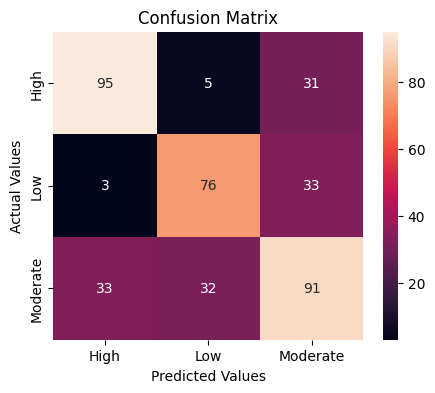

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
param_grid = {
    'penalty': ['l1', 'l2'],             # Regularization penalty ('l1' or 'l2')
    'C': [0.001, 0.01, 0.1, 1, 10, 100], # Inverse of regularization strength
    'max_iter': [100, 200, 300],         # Maximum number of iterations               # Random seed for reproducibility
}

In [ ]:
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy');
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300], 'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [ ]:
best_params = grid_search.best_params_

In [ ]:
best_params

{'C': 0.1, 'max_iter': 300, 'penalty': 'l2'}